# Practical 6: Mapping and visualisations

In this practical we will focus on consolidating some of the lessons learned on creating effective maps. In the lecture we discussed some of the important design considerations for making clear, accessible, legible, *honest* maps. Now we implement a few of those technical points. We've already been making quick plots of our geographic data and in the last practical we started to create *choropleth* maps, but we'll look at a few more options for mapping.

This practical covers several topics (and a few smaller ones along the way):
* Mapping with point-referenced data
* Adding in external basemaps or satellite imagery
* Creating thematic maps
* Adjusting classifications visualising data
* Controlling multiple layers and multiple maps

Creating static maps in Python with `GeoPandas` relies on `matplotlib` extensively. If you're less familiar with this graphics library, check out some of the tutorials: [https://matplotlib.org/tutorials/index.html](https://matplotlib.org/tutorials/index.html). It's also good to refer back to the documentation occassionally because there are many things you can control/adjust in a plot, and we can't show you everything in this limited practical session.

Be sure to read the code blocks and the comments carefully in this practical. There are a lot of parameters and settings. Experiment with changing them and re-mapping your data.

In [1]:
# load packages
import mapclassify
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# use the magic function
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

## Mapping with Point data

We will start by working with some georeferenced point data for Southampton.

### Load the data

This practical is going to re-use some of the data you created in Practical 5 when calculating the distance between LSOA and supermarket in Southampton (`../data/soton_lsoa_distance.gpkg`). If you don't have that file saved, then go back to the last practical and recreate it and save a local copy before continuing.

In [3]:
# load fast food restaurant locations
ff = gpd.read_file('../data/soton_fastfood.gpkg')

In [4]:
# convert from multipoint to single
ff = ff.explode()

In [5]:
ff.head()

,,id,@id,addr:city,addr:country,addr:housename,addr:postcode,addr:street,addr:unit,amenity,brand,...,official_name,fixme:addr2,fixme:addr4,indoor,payment:cryptocurrencies,payment:electronic_purses,source:operator,payment:cheque,path,geometry
0,0,way/171779227,way/171779227,None,None,None,None,Bedford Place,None,fast_food,Panda Express,...,None,None,None,None,None,None,None,None,"Point?crs=EPSG:4326&field=fid:long(0,0)&field=...",POINT (441859.370 112679.676)
1,0,way/153481049,way/153481049,None,None,None,None,Hanover Buildings,None,fast_food,Taco Bell,...,None,None,None,None,None,None,None,None,"Point?crs=EPSG:4326&field=fid:long(0,0)&field=...",POINT (442037.808 111700.166)
2,0,way/190393762,way/190393762,None,None,None,None,None,None,fast_food,None,...,None,None,None,None,None,None,None,None,"Point?crs=EPSG:4326&field=fid:long(0,0)&field=...",POINT (442530.383 111974.698)
3,0,way/190393777,way/190393777,None,None,None,None,None,None,fast_food,None,...,None,None,None,None,None,None,None,None,"Point?crs=EPSG:4326&field=fid:long(0,0)&field=...",POINT (442530.964 111901.139)
4,0,way/190393781,way/190393781,None,None,None,None,None,None,fast_food,None,...,None,None,None,None,None,None,None,None,"Point?crs=EPSG:4326&field=fid:long(0,0)&field=...",POINT (442530.801 111896.005)


In [6]:
# load supermarket locations
# these are the data that we cleaned and prepared in the last practical
smkt = gpd.read_file('../data/soton_smkts.gpkg')

In [7]:
# convert from multipoint to single
smkt = smkt.explode()

In [8]:
smkt.head()

,,id,@id,addr:city,addr:country,addr:housenumber,addr:postcode,addr:state,addr:street,brand,brand:wikidata,...,start_date,building:part,indoor,old_name,smoking,source:fhrs_ref,fhrs:local_authority_id,name:en,last_checked,geometry
0,0,node/300149741,node/300149741,Southampton,GB,117,SO14 2EA,None,High Street,None,None,...,None,None,None,None,None,None,None,None,None,POINT (441998.254 111123.555)
1,0,node/638921542,node/638921542,Southampton,GB,"412,414",SO18 5RS,None,Bitterne Road,None,None,...,None,None,None,None,None,None,None,None,None,POINT (445032.039 112945.309)
2,0,node/1556159256,node/1556159256,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (442498.341 112020.586)
3,0,node/2029179283,node/2029179283,Southampton,GB,17,SO18 1NN,None,Manor Farm Road,None,None,...,None,None,None,None,None,None,None,None,None,POINT (443974.650 114097.267)
4,0,node/5007213122,node/5007213122,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,International Foods,None,POINT (442693.707 112561.000)


### Basic plotting

As we have seen previously, we can use `.plot()` with `GeoDataFrames` to easily create a map. This method specifically creates a `matplotlib` axes object, which gives us a lot of flexibility for modifying the map.

<AxesSubplot:>

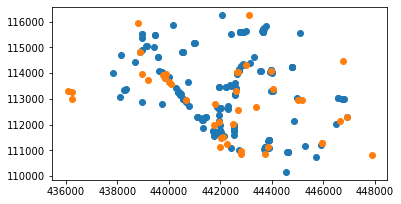

In [9]:
# create an axes object
# based on plotting the fast food locations
ax = ff.plot()

# add supermarket locations
smkt.plot(ax=ax)

Conveniently, the two layers have different colours by default.

In [10]:
# here we can see what we created is a matplotlib object
type(ax)

matplotlib.axes._subplots.AxesSubplot

We can plot these layers on separate axes. This technique can help us create the effect of *small multiples* where different cuts of the data are visualised next to one another. 

<AxesSubplot:>

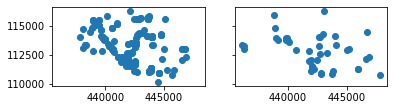

In [11]:
# create a figure with two subplots
# layers are plotted separately
fig, (ax1, ax2) = plt.subplots(ncols=2,
                               sharex=True, # make both plots line up
                               sharey=True)

# plot fast food
ff.plot(ax=ax1)
# plot supermarkets
smkt.plot(ax=ax2)

If we want to adjust the figure size, an easy way is to modify the "subplot" which will contain one figure (with multiple layers). The figure size is specified in (width, height) dimensions.

<AxesSubplot:>

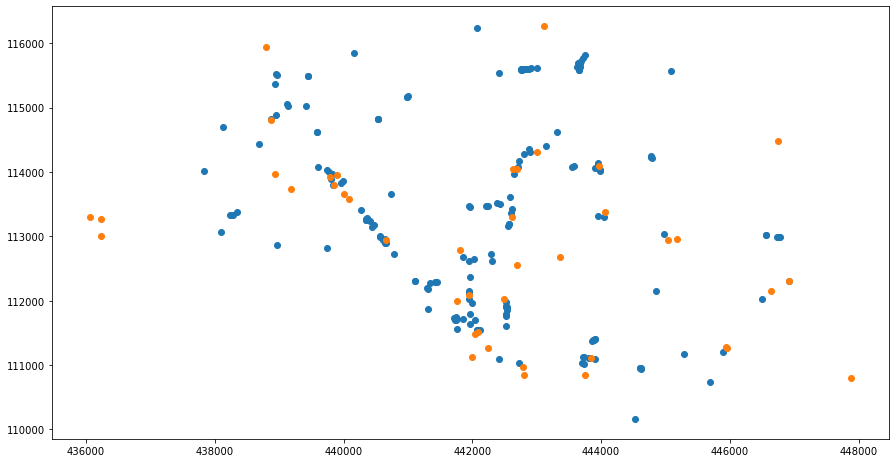

In [12]:
# adjusting figure size
fig, ax = plt.subplots(figsize=(15, 10))

# plot fast food locations
ff.plot(ax=ax)

# overlay supermarket locations
smkt.plot(ax=ax)

By plotting these two datasets separately, we can control each layer's display properties. Let's change the colour and the shape used for plotting.

The list of potential point markers is here: [https://matplotlib.org/3.2.1/api/markers_api.html](https://matplotlib.org/3.2.1/api/markers_api.html).

<AxesSubplot:>

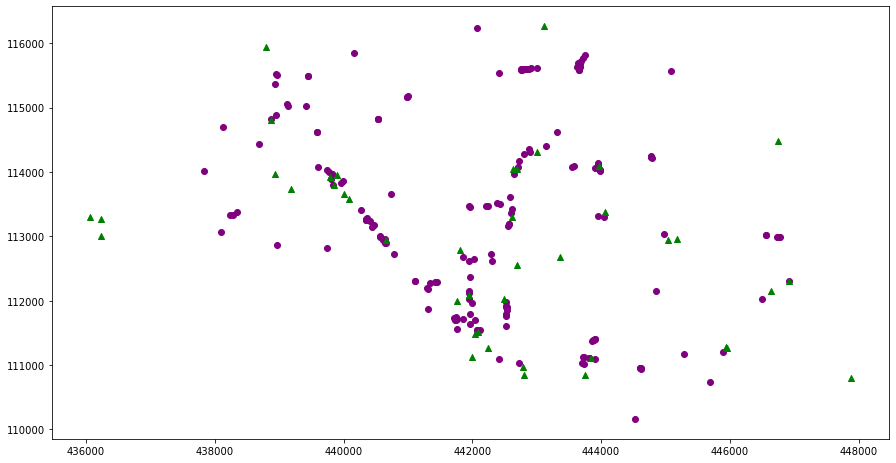

In [13]:
# adjusting layer colour and symbol style
fig, ax = plt.subplots(figsize=(15, 10))

# plot fast food locations
ff.plot(ax=ax,
        color='purple')

# overlay supermarket locations
smkt.plot(ax=ax,
          color='green',
          marker='^')

### Colour by attribute

Sometimes we may not have separate layers, but a combined data layer and we want to adjust the *symbology* based on a value in the dataset. Rather than specifying the parameters manually as we have been, we can always use an attribute within the dataset, but we have to *map* that attribute to a set of colours. 

As we discussed, choice of colour can be very important in cartographic design. It can convey certain properties making your map more legible (or more confusing!). It's also important to consider accessibility in your maps. How would a person who is colourblind interpret your map? Or if you map is printed in black and white? May be it's best to combine different symbol style and colours.

A great resource to explore different colour combinations is [ColourBrewer](https://colorbrewer2.org).

Let's first create a combined 'food points' layer to demonstrate this process. 

In [14]:
# create identifying attributes
ff['type'] = 'FF'
smkt['type'] = 'S'
# combine supermarkets and fast food restaurants
food = ff.append(smkt)

In [15]:
print(food['type'].head())
print(food['type'].tail())

0  0    FF
1  0    FF
2  0    FF
3  0    FF
4  0    FF
Name: type, dtype: object
37  0    S
38  0    S
39  0    S
40  0    S
41  0    S
Name: type, dtype: object


The first way to do this is to use `cmap` to assign a pre-designed colour map. The options available can be found here: [https://matplotlib.org/tutorials/colors/colormaps.html](https://matplotlib.org/tutorials/colors/colormaps.html).

Experiment with a few other options.

<AxesSubplot:>

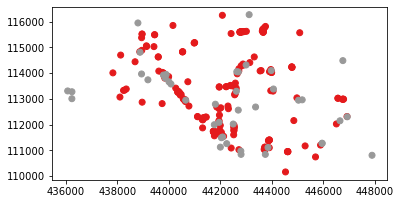

In [16]:
# create a point map, specifying colours based on an attribute
food.plot(column='type',     # define the attribute field name
          categorical=True,  # treat it as a qualitative value
          cmap='Set1')   # assign colours

Alternatively, you can manually specify your colours. 
First, create an external dictionary with colours assigned to each food point 'type'. Next, we will map those values based on the data frame column. We will store these colour assignments in the `food` GeoDataFrame for convenience.

In [17]:
palette = {'FF':'#1b9e77',  # matplotlib can also use HEX colours
           'S':'#7570b3'}

In [18]:
# use `.map()` to look up the dicionary values based on the food point type
food['cm'] = food['type'].map(palette)
food['cm'].head()

0  0    #1b9e77
1  0    #1b9e77
2  0    #1b9e77
3  0    #1b9e77
4  0    #1b9e77
Name: cm, dtype: object

<AxesSubplot:>

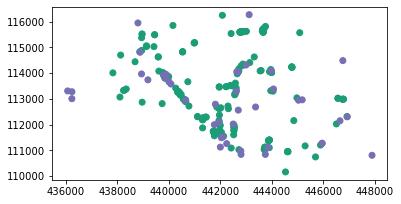

In [19]:
# create a plot using the manual colour map
# NOTE: assign column of colours to `c`, not `cmap`
food.plot(c=food['cm'])

## Adding external basemaps

So far we've seen how we can create `matplotlib` axes by plotting a GeoDataFrame. We have flexibility to modify the figure size, the colour, symbols and layers in that plot. But our maps of point locations are really lacking context that our readers need. There's no way to (easily) know that we're looking at a map of Southampton.

It's time to expand our maps by adding in some *basemaps* to provide a background for the point data maps.

In [20]:
import contextily as cx  

To add the basemaps we will be using `contextily` which makes this process very easy! 

Check the documentation here: [https://contextily.readthedocs.io/en/latest/](https://contextily.readthedocs.io/en/latest/). You can add many different kinds of basemaps and even get data from Google Earth Engine.

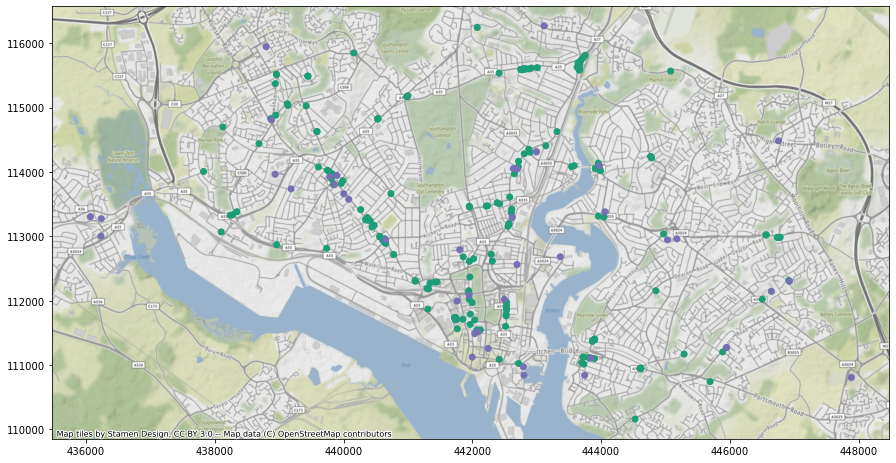

In [21]:
# start by creating a basic figure
fig, ax = plt.subplots(figsize=(15,10))

food.plot(ax=ax,
          c=food['cm'] # use our manual color map
         )

# add the basemap to the same axis
# note: this can be a little slow as it has to download tiles
cx.add_basemap(ax, # add to the same plot
               crs=food.crs.to_string()  # set the projection
              )

We now have the default basemap under our food point locations. In the code above, we had to specify the axis and the coordinate reference system. Remember from our earlier practical that most web map tiles are in Web Mercator projection (EPSG:3857). We could have reprojected our food points data to match, but here we're seeing how to modify the tiles. Reprojecting or *warping* the basemap is handled in the background by specifying `crs=`. Note, that you have to convert the GeoDataFrame CRS representation to a string.

The tiles from `contextily` are a form of *raster* or gridded data. We've only worked with vector data so far, but, in fact, we can directly access the basemap raster tiles that are downloaded. The code below opens the imagery with `rasterio`, but the files could also be downloaded an opened with other GIS software.

In [22]:
# get the extent of the point data
# but we need this in WGS84 to work with contextily
# 'total_bounds' gives us an array of coordinates for bounding box
bb = food.to_crs(epsg=4326).total_bounds

# download tiles to data directory
_ = cx.bounds2raster(*bb,
                     ll=True,
                     path='../data/soton.tif' # save as GeoTiff file
                    )

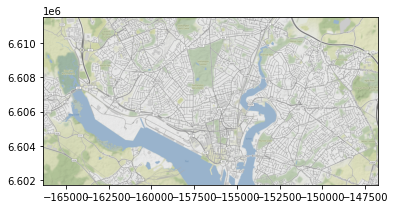

In [23]:
# access the raster data
# load new package for raster data
import rasterio
from rasterio.plot import show as rioshow

# create a dataset reader
with rasterio.open("../data/soton.tif") as r:
    rioshow(r)

Experiment with some of the other available basemaps by changing the `source=` to a different provider. The basemap providers that are available by default are coming from a Leaflet extension. Preview them here: [http://leaflet-extras.github.io/leaflet-providers/preview/](http://leaflet-extras.github.io/leaflet-providers/preview/)

Try the satellite imagery ('cx.providers.Esri.WorldImagery'). But sometimes in a map, less is more, a minimalist basemap is more appropriate (such as 'cx.providers.Stamen.TonerLite').

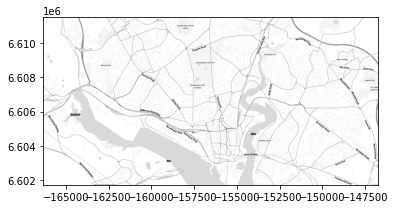

In [24]:
# Create new plots with food GeoDataFrame and test different basemaps

# download tiles to data directory
_ = cx.bounds2raster(*bb,
                     ll=True,
                     source=cx.providers.Stamen.TonerLite,
                     path='../data/soton.tif' # save as GeoTiff file
                    )

with rasterio.open("../data/soton.tif") as r:
    rioshow(r)

### Adding additional map elements

Our maps are starting to look better. Now we can add basemaps or even satellite imagery to give us a little context for the area we're mapping. But good cartographic design often incorporates a few more details. In this next section we'll add scale bars, to indicate distances, legends to explain the data symbology, and a title. These are all elements you may need to add to publication-ready maps.

#### Scale bar and north arrow

A scale bar is a measured line or patch that depicts distances in the map. Showing distance becomes more difficult when plotting with latitude/longitude since the distance of 1 degree of longitude changes with latitude. But our data are projected (EPSG 27700), so distance is consistently measured in meters in both the x and y direction.

To create a scale bar, we'll add a 'patch' in `matplotlib` of a known size. The north arrow uses similar `matplotlib` techniques with annotations.

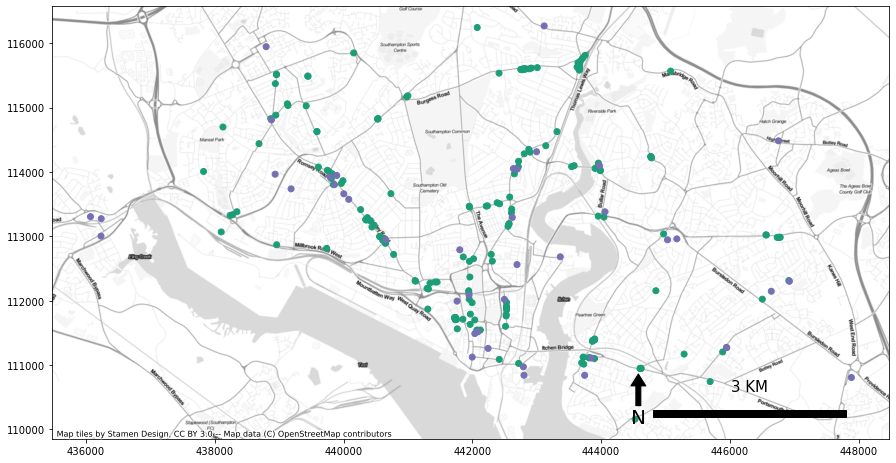

In [25]:
# start by making a base map
fig, ax = plt.subplots(figsize=(15,10))

food.plot(ax=ax,
          c=food['cm'] # use our manual color map
         )

cx.add_basemap(ax=ax,
               crs=food.crs.to_string(),
               source=cx.providers.Stamen.TonerLite)

# add a scale bar patch area
# the scale bar will 3KM in size

# specify the location (in x,y coordinates) and length (all in meters)
x, y, scale_len = 444800, 110200, 3000  

scale_rect = matplotlib.patches.Rectangle((x,y),     # location
                                          scale_len, # length
                                          100,       # height or thickness of scale bar
                                          linewidth=1,
                                          edgecolor='k',facecolor='k' # black in colour
                                         )
# add scale bar onto plot
ax.add_patch(scale_rect)

# add a label to the scale bar
plt.text(x + scale_len/2, y + 400, # locate the label in the center of the bar
         s='3 KM', 
         fontsize=15, 
         horizontalalignment='center')

# add a north arrow
# this assumes that North is up on your map
# if not - change the direction of the arrow
# https://stackoverflow.com/a/58110049/604456

# specify location - in figure proportions (not real-world coordinates)
x, y, arrow_length = 0.7, 0.15, 0.1

ax.annotate('N', #
            xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

plt.show()

#### Legend and title

We will now add on to our previous mapping script to add in a legend, with appropriate labels, as well as an informative title. We're building the start of a mapping workflow here: building up a script that allows us to make minor changes and improvements and replicate a plot easily. 

You might also notice that the tiles from `contextily` are no longer slowing you down. That's because the downloaded files have been cached and get reused, making it more efficient to iterate small changes on a plot.

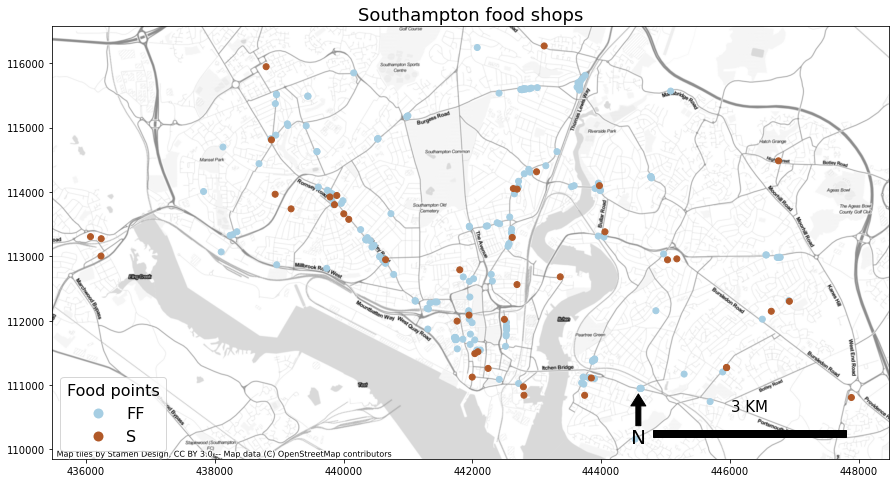

In [26]:
# start by making a base map
fig, ax = plt.subplots(figsize=(15,10))

food.plot('type',
          ax=ax,
          cmap='Paired', # use a new color map
          # THIS IS NEW
          legend=True, 
          categorical=True,
          legend_kwds={'loc':'lower left',
                       'title':'Food points',
                       'fontsize':16,
                       'title_fontsize':16
                      }
         )

cx.add_basemap(ax=ax,
               crs=food.crs.to_string(),
               source=cx.providers.Stamen.TonerLite)

# add a scale bar patch area
# the scale bar will 3KM in size

# specify the location (in x,y coordinates) and length (all in meters)
x, y, scale_len = 444800, 110200, 3000  

scale_rect = matplotlib.patches.Rectangle((x,y),     # location
                                          scale_len, # length
                                          100,       # height or thickness of scale bar
                                          linewidth=1,
                                          edgecolor='k',facecolor='k' # black in colour
                                         )
# add scale bar onto plot
ax.add_patch(scale_rect)

# add a label to the scale bar
plt.text(x + scale_len/2, y + 400, # locate the label in the center of the bar
         s='3 KM', 
         fontsize=15, 
         horizontalalignment='center')

# add a north arrow
# this assumes that North is up on your map
# if not - change the direction of the arrow
# https://stackoverflow.com/a/58110049/604456

# specify location - in figure proportions (not real-world coordinates)
x, y, arrow_length = 0.7, 0.15, 0.1

ax.annotate('N', #
            xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

# add a title
ax.set_title('Southampton food shops', fontdict={'fontsize':18})

plt.show()

For more complex legends, it may be necessary to plot each layer separately and add a `label` so that you can access and set those properties manually. Right now the plot is using the default attributes for the `type` field.

See for an example: [https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/).

## Thematic maps

In this next section we will set aside point maps, and return to *choropleth* mapping with our LSOA data with the distance to supermarkets calculated in the last practical. We briefly saw how `cmap` and different classification patterns can be used. We will look at how those break points are created with `mapclassify` in more detail, how to apply them to the continuous data, and adjust the plotting options.

### Load the LSOA data

In [27]:
lsoa = gpd.read_file('../data/soton_lsoa_distance.gpkg')

In [28]:
lsoa.head()

,lsoa,smkt_count,smkt_dist,geometry
0,E01017136,0.0,257.280417,"POLYGON ((441876.774 112587.161, 441877.875 11..."
1,E01017137,1.0,269.526033,"POLYGON ((441632.370 112875.041, 441631.994 11..."
2,E01017138,0.0,372.747407,"POLYGON ((441307.700 112577.580, 441308.208 11..."
3,E01017139,1.0,247.854310,"POLYGON ((442373.000 111482.000, 442372.963 11..."
4,E01017140,4.0,331.716277,"POLYGON ((441981.000 111652.000, 441980.000 11..."


### Map classifications

More details on `mapclassify` can be found here: [https://pysal.org/mapclassify/](https://pysal.org/mapclassify/). `GeoPandas` allows us to set the classification 'scheme' directly in the plotting function.

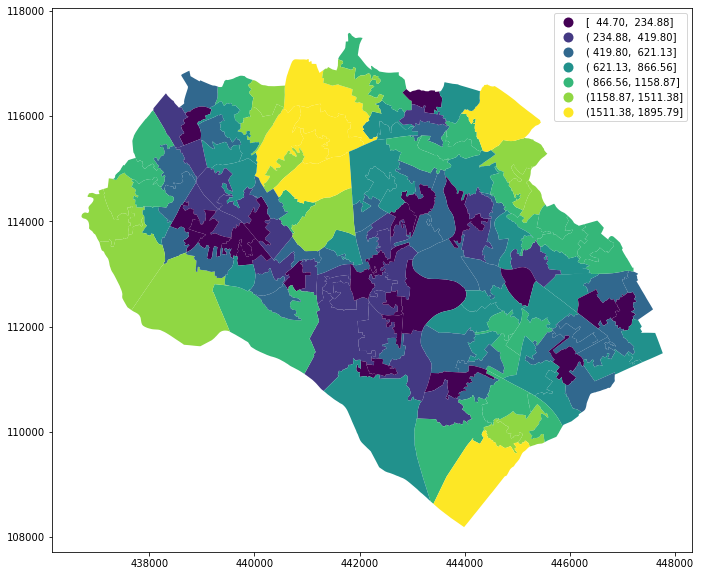

In [29]:
# create a 7 class plot based on "Natural Breaks"
# use a default colour map pattern
lsoa.plot('smkt_dist',
          scheme='NaturalBreaks',
          k=7,
          legend=True,
          figsize=(15,10)  # notice we can set the size directly here
         )

plt.show()

Remember, if we don't set the `scheme` then the data are treated as a continuous colormap and you'll see a color bar as the legend type.

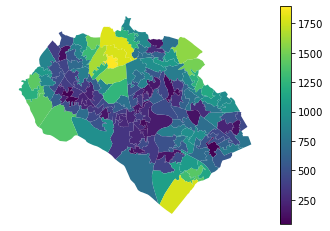

In [30]:
lsoa.plot('smkt_dist',
          legend=True,
         )

plt.axis('off') # turn off the "box"
plt.show()

Internally, `mapclassify` is creating a set of breaks for the column of values supplied. We can inspect this directly ourselves.

In [31]:
# natural breaks
mapclassify.NaturalBreaks(lsoa.smkt_dist, k=7)

NaturalBreaks             

     Interval        Count
--------------------------
[  44.70,  247.85] |    24
( 247.85,  429.81] |    26
( 429.81,  621.13] |    31
( 621.13,  866.56] |    24
( 866.56, 1158.87] |    22
(1158.87, 1511.38] |    14
(1511.38, 1895.79] |     7

Another common classifier is to use quantiles.

In [32]:
# create quintiles (k=5)
mapclassify.Quantiles(lsoa.smkt_dist, k=5)

Quantiles                 

     Interval        Count
--------------------------
[  44.70,  288.06] |    30
( 288.06,  482.56] |    29
( 482.56,  718.46] |    30
( 718.46,  974.79] |    29
( 974.79, 1895.79] |    30

Try a few other classifiers on your own - looking at the break points or trying them in a map.

In [33]:
# test mapclassify options

mapclassify.FisherJenks(lsoa.smkt_dist, k=5)
#

FisherJenks               

     Interval        Count
--------------------------
[  44.70,  339.12] |    37
( 339.12,  621.13] |    44
( 621.13, 1053.71] |    43
(1053.71, 1431.42] |    15
(1431.42, 1895.79] |     9

In [34]:
mapclassify.MaximumBreaks(lsoa.smkt_dist, k=5)

MaximumBreaks             

     Interval        Count
--------------------------
[  44.70, 1463.73] |   139
(1463.73, 1618.47] |     4
(1618.47, 1715.97] |     1
(1715.97, 1846.25] |     3
(1846.25, 1895.79] |     1

In [35]:
mapclassify.JenksCaspallForced(lsoa.smkt_dist, k=5)

JenksCaspallForced        

     Interval        Count
--------------------------
[  44.70,  286.97] |    30
( 286.97,  482.17] |    29
( 482.17,  717.03] |    30
( 717.03,  972.91] |    29
( 972.91, 1895.79] |    30

#### Histograms

A good way to inspect your map classification is to view a histogram of the data. This will show you how the underlying data are distributed and how you might visualise them most effectively.

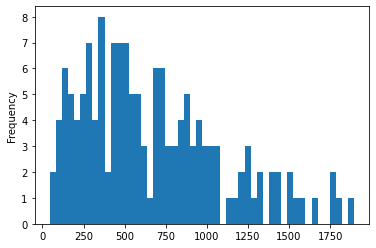

In [36]:
# plot a basic histogram using `Pandas`
lsoa['smkt_dist'].plot.hist(bins=50)

plt.show()

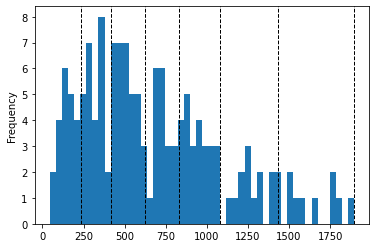

In [37]:
# create a classifier and store it to access the bins
# Natural Breaks
mc = mapclassify.NaturalBreaks(lsoa.smkt_dist, k=7)

# plot the historgram
lsoa['smkt_dist'].plot.hist(bins=50)

# add lines for the classification bins
for val in mc.bins:
    plt.axvline(val, 
                color='k',
                linestyle='dashed',
                linewidth=1
               )

plt.show()

Now check the breaks for a quantile classification.

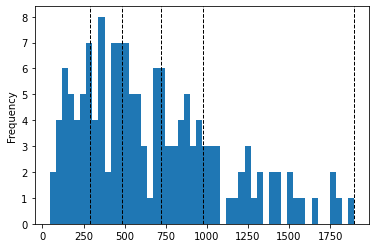

In [38]:
# create a classifier and store it to access the bins
# Quintiles
mc = mapclassify.Quantiles(lsoa.smkt_dist, k=5)

# plot the historgram
lsoa['smkt_dist'].plot.hist(bins=50)

# add lines for the classification bins
for val in mc.bins:
    plt.axvline(val, 
                color='k',
                linestyle='dashed',
                linewidth=1
               )

plt.show()

### Applying different legends

Let's take what we've learned about reclassifying our data and building legends to start to make a better looking map. Experiment with the code below to make your own map.

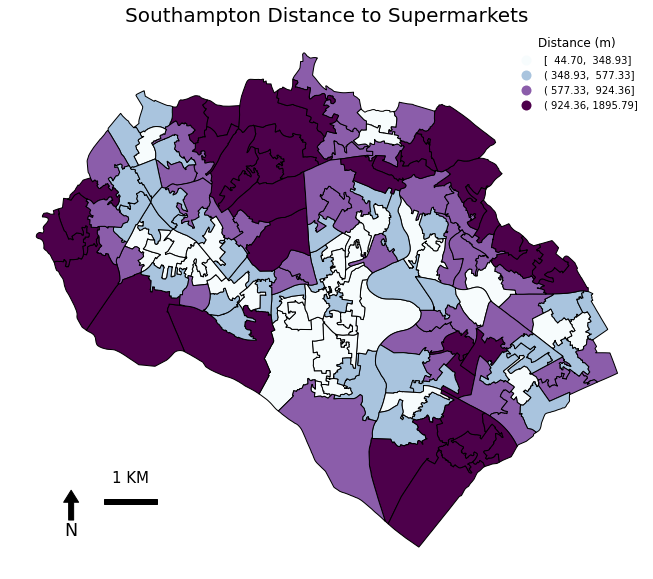

In [39]:
# create the figure
fig, ax = plt.subplots(figsize=(15,10))

# plot the LSOA data
lsoa.plot('smkt_dist',
          legend=True,
          legend_kwds={'title':'Distance (m)',
                       'title_fontsize':12,
                       'loc':'upper right',
                       'frameon':False
                      },
          scheme='quantiles',
          k=4,
          cmap='BuPu',
          edgecolor='k',  # darken the LSOA borders
          ax=ax
         )

# specify the location (in x,y coordinates) and length (all in meters)
x, y, scale_len = 438000, 109000, 1000  

scale_rect = matplotlib.patches.Rectangle((x,y),     # location
                                          scale_len, # length
                                          100,       # height or thickness of scale bar
                                          linewidth=1,
                                          edgecolor='k',facecolor='k' # black in colour
                                         )
# add scale bar onto plot
ax.add_patch(scale_rect)

# add a label to the scale bar
plt.text(x + scale_len/2, y + 400, # locate the label in the center of the bar
         s='1 KM', 
         fontsize=15, 
         horizontalalignment='center')

# add a north arrow
# this assumes that North is up on your map
# if not - change the direction of the arrow
# https://stackoverflow.com/a/58110049/604456

# specify location - in figure proportions (not real-world coordinates)
x, y, arrow_length = 0.1, 0.15, 0.075

ax.annotate('N', #
            xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=17.5,
            xycoords=ax.transAxes)



# add a title
ax.set_title('Southampton Distance to Supermarkets',
            fontsize=20)
# remove the "box" for a clean look
ax.axis('off')

plt.show()

## Controlling layers

Let's continue to improve on our choropleth map of supermarket distance. We'll add in an overlay of all the supermarket location points. Then we'll see how we can control a few other options for how to symbolise the data.

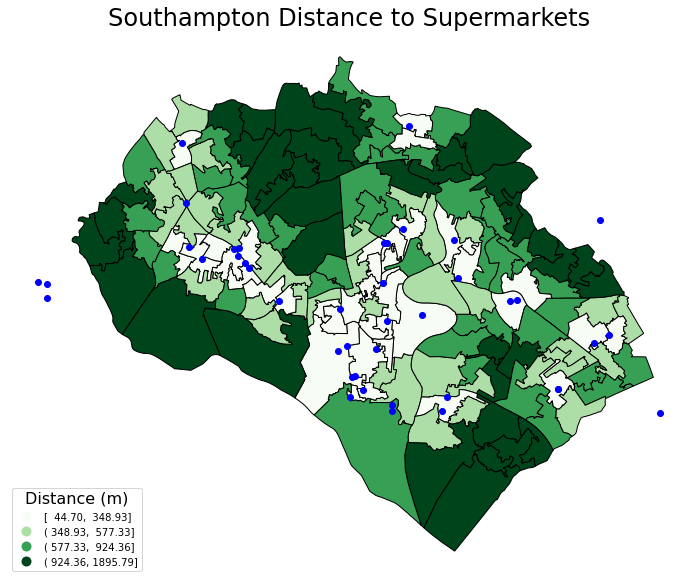

In [40]:
# create the figure
fig, ax = plt.subplots(figsize=(15,10))

# plot the LSOA data
lsoa.plot('smkt_dist',
          legend=True,
          legend_kwds={'title':'Distance (m)',
                       'title_fontsize':16,
                       'loc':'lower left'
                      },
          scheme='quantiles',
          k=4,
          cmap='Greens',
          edgecolor='k',  # darken the LSOA borders
          ax=ax
         )

# THIS IS NEW
pts = plt.scatter(smkt.geometry.x, smkt.geometry.y, 
                  color='blue')

# add a title
ax.set_title('Southampton Distance to Supermarkets',
            fontsize=24)
# remove the "box" for a clean look
ax.axis('off')

plt.show()

## Saving maps

Once we have a created a map we're happy with, let's save it out to a file that we can share or include in a report or presentation.

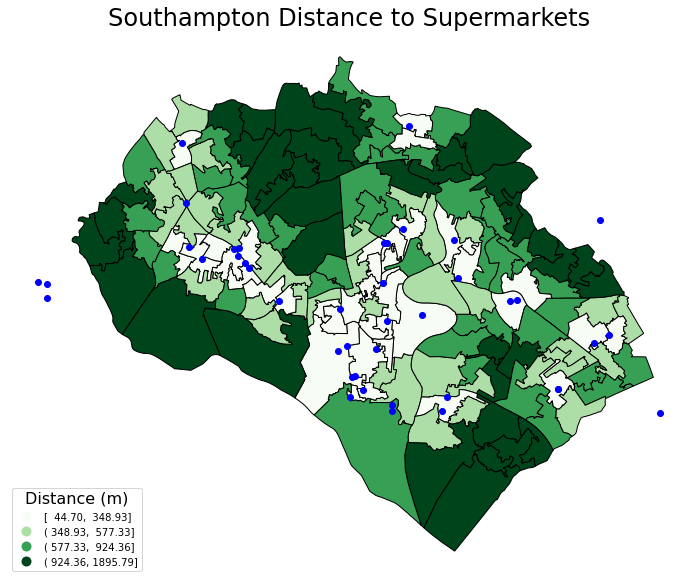

In [41]:
# create the figure
fig, ax = plt.subplots(figsize=(15,10))

# plot the LSOA data
lsoa.plot('smkt_dist',
          legend=True,
          legend_kwds={'title':'Distance (m)',
                       'title_fontsize':16,
                       'loc':'lower left'
                      },
          scheme='quantiles',
          k=4,
          cmap='Greens',
          edgecolor='k',  # darken the LSOA borders
          ax=ax
         )

# THIS IS NEW
pts = plt.scatter(smkt.geometry.x, smkt.geometry.y, 
                  color='blue')

# add a title
ax.set_title('Southampton Distance to Supermarkets',
            fontsize=24)
# remove the "box" for a clean look
ax.axis('off')

# SAVE with a DPI of 300
plt.savefig('soton_test.png', dpi=300)

Finished! Well done!